In [1]:
import grizli                                                                              
from grizli import multifit
import glob,os

import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt

from collections import OrderedDict

In [8]:
def frame_stats(file,clip=2.74e26):

    pf = fits.open(file)
    pf.info()
    sci = pf['SCI'].data

    X = sci.flatten()
    print("Mean =",np.nanmean(X))
    print("Median =",np.nanmedian(X))
    print("Std =",np.nanstd(X))
    print("Min =",np.nanmin(X))
    print("Max =",np.nanmax(X))
    print("Total pixels =",len(X))
    filt = np.isnan(X)
    print("NaNs =",len(X[filt]))
    filt = np.isinf(X)
    print("Inf =",len(X[filt]))
    filt = X > clip
    print("> %.2e = %i" % (clip,len(X[filt])))
    filt = X < -clip
    print("< -%.2e = %i" % (clip,len(X[filt])))
    print(sci)

In [ ]:
LOCAL_PATH = "/local/RomanSims/grizli/sims/"
root = "hlss_single_v5"
prefix = "hlss"
#field = "field_0022"
field = "field_0021"

In [ ]:
os.chdir(os.path.join(LOCAL_PATH, root, 'Extractions', field))              

In [ ]:
ind = 0
L = glob.glob("*.beams.fits")
print(len(L))
print(L[ind])
frame_stats(L[ind],clip=2.74e26)

In [25]:
LOCAL_PATH = "/home/gwalth/data/Roman/grizli/sims/"
root = "hlss_single_v5"
prefix = "hlss"
#field = "field_0022"
field = "field_0021"

In [26]:
os.chdir(os.path.join(LOCAL_PATH, root, 'Prep', field))              

In [27]:
f = "Euclid_Roman_4deg2_%s_v5_slitless.fits" % (field)
frame_stats(f,clip=2.74e26)

Filename: Euclid_Roman_4deg2_field_0021_v5_slitless.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  SCI           1 ImageHDU        71   (4091, 4091)   float32   
  2  ERR           1 ImageHDU        71   (4091, 4091)   float32   
  3  DQ            1 ImageHDU        35   (4091, 4091)   int32   
Mean = 2.5592439e+26
Median = 0.0029069767
Std = inf
Min = 0.0
Max = 1.9865078e+33
Total pixels = 16736281
NaNs = 0
Inf = 0
> 2.74e+26 = 28
< -2.74e+26 = 0
[[0.00041528 0.00041528 0.00083056 ... 0.00332226 0.00207641 0.00332226]
 [0.00083056 0.00083056 0.00041528 ... 0.00290698 0.00249169 0.00124585]
 [0.00083056 0.00124585 0.00124585 ... 0.00083056 0.00041528 0.00124585]
 ...
 [0.00083056 0.00207641 0.         ... 0.         0.         0.        ]
 [0.00041528 0.00083056 0.00124585 ... 0.         0.         0.        ]
 [0.00041528 0.00041528 0.00083056 ... 0.         0.         0.        ]]


Filename: Euclid_Roman_4deg2_field_0021_v5_slitless.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  SCI           1 ImageHDU        71   (4091, 4091)   float32   
  2  ERR           1 ImageHDU        71   (4091, 4091)   float32   
  3  DQ            1 ImageHDU        35   (4091, 4091)   int32   


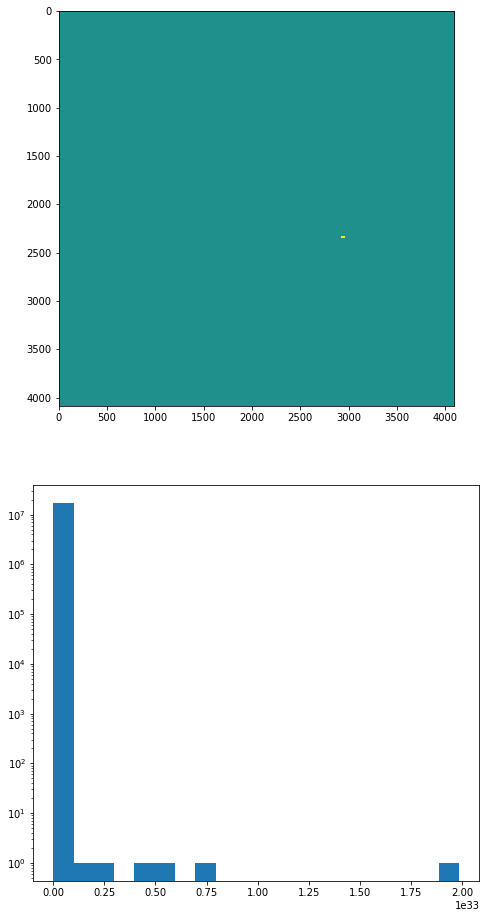

In [30]:
#v0 = -0.1
#v1 = 0.1
v0 = -100
v1 = 100

pf = fits.open(f)
pf.info()
sci = pf['SCI'].data

X = sci.flatten()

fig = plt.figure(figsize=(8,16))

ax1 = fig.add_subplot(211)
ax1.imshow(sci, vmin=v0, vmax=v1)

ax2 = fig.add_subplot(212)
ax2.hist(X,bins=20)
ax2.set_yscale("log")

plt.show()

In [ ]:
sim = multifit.GroupFLT(grism_files=glob.glob('*GrismFLT.fits'),                       
                        catalog='{0}-ir.cat.fits'.format(prefix),                      
                        cpu_count=-1, sci_extn=1, pad=800)                             

In [ ]:
print(sim.__dict__)
print(dir(sim))
#cat = sim.catalog
#print(cat.colnames)
#print(cat['NUMBER','X_WORLD','Y_WORLD','MAG_AUTO'])

In [ ]:
print(sim.FLTs)
all_ids = [id for flt in sim.FLTs for id in flt.object_dispersers]
print(all_ids)

In [ ]:
id = 3
beams = sim.compute_single_model(id, is_cgs=True, get_beams=['A'])  
print(beams[0]['A'].__dict__)
print(dir(beams[0]['A']))
img = beams[0]['A'].direct
#img = beams[0]['A'].optimal_extract

print(type(img))
print(img.__dict__)

print(dir(img))

fig = plt.figure()
p1 = fig.add_subplot(111)
p1.imshow(img, origin='lower',cmap='gray_r')

#p1.imshow(cutout.grism.data['SCI']*1, origin='lower',cmap='gray_r')
#p1.imshow(cutout.grism.data['ERR']*1)#,vmin=-0.1,vmax=0.1, origin='lower',cmap='gray_r')
    